# scikit-learn中的回归问题和knn回归

In [34]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## 1、导入数据集

In [35]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [36]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

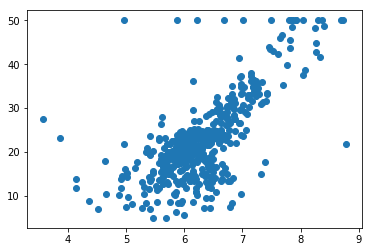

In [37]:
plt.scatter(X[:,5], y)

## 2、异常数据清理

In [38]:
X = X[y<50]
y = y[y<50]

In [39]:
X.shape

(490, 13)

## 3、数据分割train_test_split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

## 4、sklearn中的线性回归

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

### 4.1、fit
传入X_train y_train计算系数coef_、截距.intercept_

In [43]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

* 截距.intercept_

In [44]:
lin_reg.intercept_

32.64566083965351

* 系数.coef_

In [45]:
lin_reg.coef_

array([-1.14235739e-01,  3.12783163e-02, -4.30926281e-02, -9.16425531e-02,
       -1.09940036e+01,  3.49155727e+00, -1.40778005e-02, -1.06270960e+00,
        2.45307516e-01, -1.23179738e-02, -8.80618320e-01,  8.43243544e-03,
       -3.99667727e-01])

### 4.2、预测predict(X_test)

In [46]:
lin_reg.predict(X_test)

array([18.06720061, 25.38842052, 12.88637643, 32.90835204, 24.45397988,
        2.30708724, 26.64169324, 31.60871402, 14.04669932, 24.51624441,
       14.80334503, 10.57965738, 30.04628378, 16.39172915, 23.89512828,
       25.39852591, 18.8543776 , 23.87690579, 28.78827968, 27.02022135,
       12.76509984, 27.00275212, 26.14846529, 22.86315467, 20.89563046,
       32.05888636, 14.79193377, 20.41277625, 12.9193449 , 30.15501477,
       35.54985439,  5.26900466, 13.14886325, 35.86197895, 16.03765405,
       21.27787584, 12.60030385, 29.36848015, 27.49792281, 24.00066354,
       14.13586558, 23.43977185, 11.17683708, 22.31129063, 18.58987771,
       16.41995801, 24.9447416 , 33.28366331, 19.11389151, 27.22704584,
       18.07947567, 14.92767526, 25.22396514, 16.21008419, 21.65562831,
       16.22903694, 24.0692956 , 11.74802373, 27.94364395, 30.83194969,
       19.71563014, 24.79766319, 25.89834136, 12.26941076, 16.75583436,
       27.25274785, 22.47751458, 22.1732599 , 31.48171107, 13.99

### 4.3、预测准确率.score

In [47]:
lin_reg.score(X_test, y_test)

0.80089161995191

## 5、KNN Regressor用knn解决回归问题

### 5.1、建立KNN类实例KNeighborsRegressor()

In [48]:
from sklearn.neighbors import  KNeighborsRegressor
knn_reg = KNeighborsRegressor()

### 5.2、实例拟合训练数据fit(X_train, y_train)

In [49]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

### 5.3、预测predict（X_test）

In [50]:
knn_reg.predict(X_test)

array([18.36, 31.62, 10.86, 33.14, 22.34,  8.74, 28.18, 34.74, 16.4 ,
       32.42, 16.24, 18.7 , 23.04, 15.4 , 21.86, 28.5 , 15.6 , 22.  ,
       27.08, 28.52, 10.26, 24.34, 24.22, 32.32, 22.34, 24.96, 19.24,
       23.48, 10.86, 24.54, 37.16, 11.86, 11.66, 34.1 , 19.12, 18.94,
       10.4 , 23.62, 19.06, 19.22, 12.82, 25.66, 16.5 , 24.64, 24.56,
       15.76, 24.8 , 37.16, 20.  , 21.96, 18.48, 10.26, 26.02, 19.22,
       24.8 , 28.5 , 24.16, 17.52, 23.5 , 34.74, 19.04, 26.2 , 22.3 ,
       10.36, 13.68, 24.76, 20.68, 21.46, 27.08, 11.2 , 16.8 , 19.06,
       19.28, 20.52, 12.04, 20.9 , 21.82, 17.68, 15.52, 28.7 , 19.9 ,
       21.28, 20.52, 16.6 , 28.42, 20.56, 23.42, 21.84, 27.42, 17.86,
       31.62, 29.94, 32.44, 24.24, 37.16, 31.82, 34.74, 23.5 , 12.22,
       17.22, 31.98, 17.8 , 28.64, 19.88, 16.4 , 19.14, 20.26, 21.6 ,
       22.  , 37.16, 22.16, 26.42,  8.84, 21.76, 34.74, 12.64, 21.88,
       20.36, 24.96, 10.52, 31.98, 16.4 , 14.26])

### 5.4、准确率score

In [51]:
knn_reg.score(X_test, y_test)

0.602674505080953